# Part II - (Ford GoBike Data Exploration)
## by (NIHARIKA JAIN)

## Investigation Overview


> In this final project, I chose Ford GoBike Dataset. This dataset includes more than 1,83,412 trips with 15 attributes such as locations, station names, bike ids, gender, and user attributes(Subscriber or Customer). There is start and end stations information as well. 


## Dataset Overview

> The Ford GoBike data consists of around 1,83,412 Bay Wheels trip data captured during Aug 2019. Dataset includes
> - Trip Duration (seconds)
> - Start Time and Date
> - End Time and Date
> - Start Station ID
> - Start Station Name
> - Start Station Latitude
> - Start Station Longitude
> - End Station ID
> - End Station Name
> - End Station Latitude
> - End Station Longitude
> - Bike ID
> - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
> - Member Year of Birth
> - Member Gender
> - bike_share_for_all_trip
> - start_date
> - month_of_trip
> - day_of_week
> - trip_hour
> - trip_duration_minute
> - start_time_day
> - weekday_or_weekend

In [19]:
import warnings

warnings.filterwarnings('ignore')

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [20]:
# load in the dataset into a pandas dataframe
fordgobike=pd.read_csv('201902-fordgobike-tripdata.csv')
fordgobike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [21]:
fordgobike_copy=fordgobike.copy()

#issue1: Removing Null Values

fordgobike_copy = fordgobike_copy[fordgobike_copy['start_station_id'].isnull() == False]
fordgobike_copy = fordgobike_copy[fordgobike_copy['end_station_id'].isnull() == False]

#issue2: Converting Start time and End Time Datatypes to DateTime

fordgobike_copy['start_time']=pd.to_datetime(fordgobike_copy['start_time'])
fordgobike_copy['end_time']=pd.to_datetime(fordgobike_copy['end_time'])

#Converting Start Station Id, End Station ID & Bake ids Datatypes to Int
fordgobike_copy['start_station_id']=fordgobike_copy['start_station_id'].astype(int)
fordgobike_copy['end_station_id']=fordgobike_copy['end_station_id'].astype(int)
fordgobike_copy['bike_id']=fordgobike_copy['bike_id'].astype(int)

#Converting Usertype and Member gender Datatypes to Categorical
fordgobike_copy['user_type']=fordgobike_copy['user_type'].astype('category')
fordgobike_copy['member_gender']=fordgobike_copy['member_gender'].astype('category')
fordgobike_copy['bike_share_for_all_trip']=fordgobike_copy['bike_share_for_all_trip'].astype('category')

#issue3: create new columns to help in further analysis

fordgobike_copy['start_date'] = fordgobike_copy['start_time'].dt.strftime('%Y-%m-%d')
fordgobike_copy['month_of_trip'] = fordgobike_copy['start_time'].dt.strftime('%B')
fordgobike_copy['day_of_week']= fordgobike_copy['start_time'].dt.strftime('%A')
fordgobike_copy['trip_hour']= fordgobike_copy['start_time'].dt.hour
fordgobike_copy['trip_duration_minute'] = fordgobike_copy['duration_sec']/60
fordgobike_copy['start_time_day']=fordgobike_copy['start_time'].dt.day.astype(int)

In [22]:
fordgobike_copy.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,month_of_trip,day_of_week,trip_hour,trip_duration_minute,start_time_day
143898,323,2019-02-07 13:58:22.564,2019-02-07 14:03:46.328,6,The Embarcadero at Sansome St,37.804770,-122.403234,14,Clay St at Battery St,37.795001,...,Subscriber,1989.0,Female,No,2019-02-07,February,Thursday,13,5.383333,7
70772,1565,2019-02-19 17:41:33.964,2019-02-19 18:07:39.717,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,141,Valencia St at Cesar Chavez St,37.747998,...,Subscriber,1990.0,Male,No,2019-02-19,February,Tuesday,17,26.083333,19
37455,369,2019-02-23 14:08:53.149,2019-02-23 14:15:02.795,349,Howard St at Mary St,37.781010,-122.405666,27,Beale St at Harrison St,37.788059,...,Subscriber,1967.0,Male,Yes,2019-02-23,February,Saturday,14,6.150000,23
15192,740,2019-02-27 09:46:04.034,2019-02-27 09:58:24.759,56,Koshland Park,37.773414,-122.427317,22,Howard St at Beale St,37.789756,...,Subscriber,1987.0,Male,No,2019-02-27,February,Wednesday,9,12.333333,27
122904,139,2019-02-11 10:19:16.731,2019-02-11 10:21:36.684,299,Bestor Art Park,37.323678,-121.874119,296,5th St at Virginia St,37.325998,...,Subscriber,1993.0,Male,Yes,2019-02-11,February,Monday,10,2.316667,11


## (Univariate Exploration)

In [23]:
def counplot_graph(dataFrame, xAxis, basecolor, title, xLabel, yLabel, labelsize=10, titleSize=15,labelpad=10):
    '''
    This is the basic function for Count plots. 
    Our count plot grapgh will create after providing basic information such as dataFrame, xaxis, basecolor, title, xLabel, yLabel information.
    Labelsize, titleSize and labelpad default values already provided..
    '''
    sb.countplot(data=dataFrame, x=xAxis,color=basecolor)
    plt.title(title,fontsize=titleSize)
    plt.xlabel(xLabel,fontsize=labelsize,labelpad=labelpad)
    plt.ylabel(yLabel,fontsize=labelsize,labelpad=labelpad);

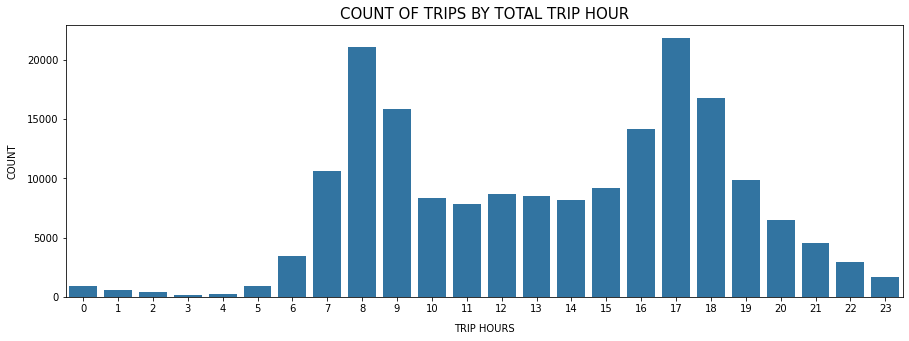

In [24]:
#figure1
plt.subplots(figsize = (15,5))
base_color=sb.color_palette()[0]

#using user-defined function for countplot grapgh
counplot_graph(fordgobike_copy,
               'trip_hour',
               base_color,
               'COUNT OF TRIPS BY TOTAL TRIP HOUR',
               'TRIP HOURS',
               'COUNT')

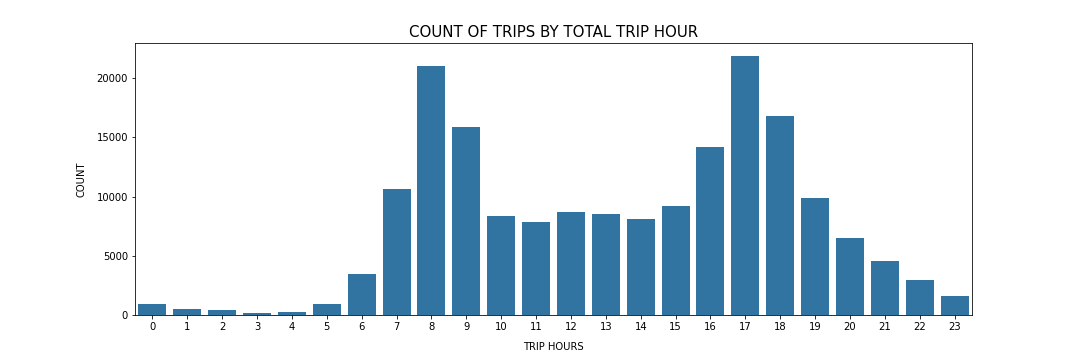

> __According to the above observation, most bikers like to ride at 8:00 a.m., followed by 5:00 - 6:00 p.m. It's probably because the majority of them choose to ride their bikes during work hours!__

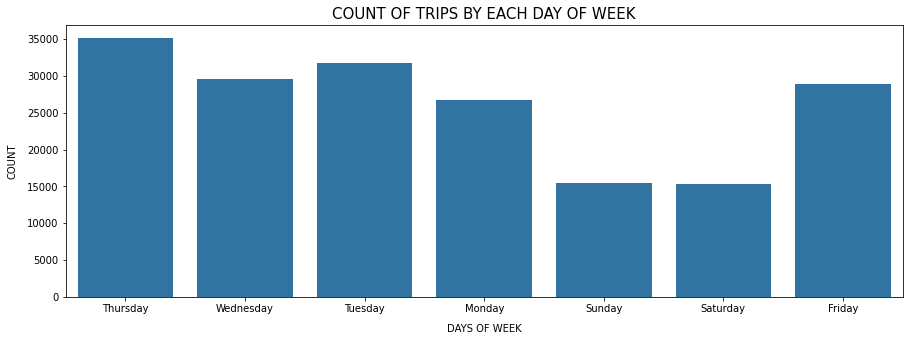

In [25]:
#figure2
plt.subplots(figsize = (15,5))

#using user-defined function for countplot grapgh
counplot_graph(fordgobike_copy,
               'day_of_week',
               base_color,
               'COUNT OF TRIPS BY EACH DAY OF WEEK',
               'DAYS OF WEEK',
               'COUNT')

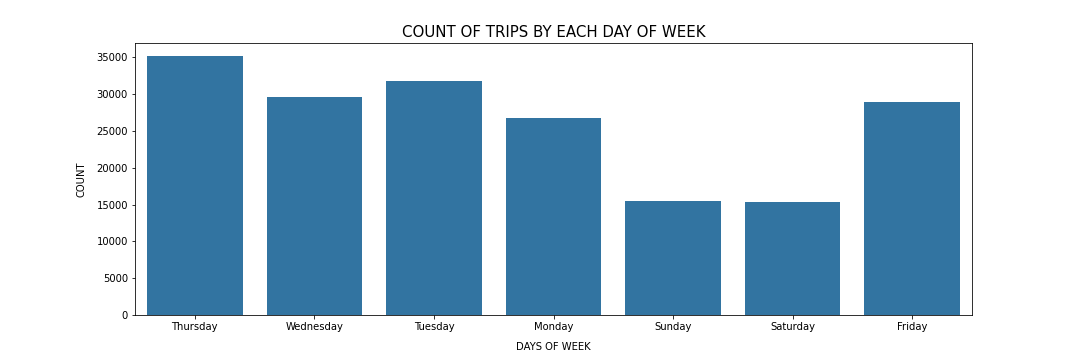

> __Thursday has been the most popular day for bike rides, followed by Tuesday and Wednesday. Also, I can see that the days with the least number of bike rides were Sundays and Saturdays, with a roughly equal number of rides!__

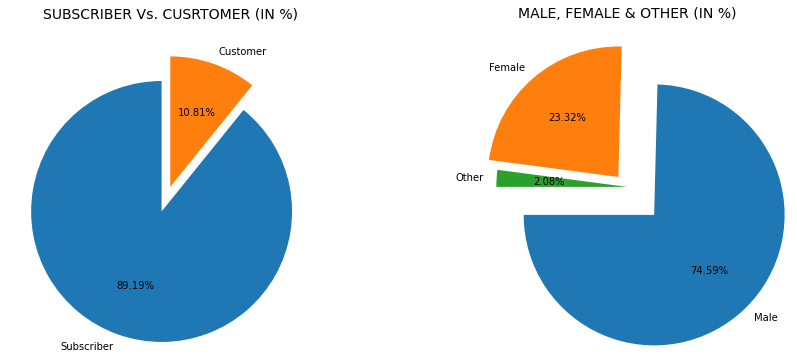

In [26]:
#figure3
plt.figure(figsize=[15,6])

plt.subplot(1,2,1)
usertype_counts = fordgobike_copy['user_type'].value_counts()

explodeTuple=(0.2,0)

plt.pie(usertype_counts,
        explode=explodeTuple,
        labels = usertype_counts.index, 
        autopct='%1.2f%%',
        startangle=90)

plt.title('SUBSCRIBER Vs. CUSRTOMER (IN %)', fontsize=14);


plt.subplot(1,2,2)

gender_counts = fordgobike_copy['member_gender'].value_counts()

explodeTuple=(0.3,0.1,0)

plt.pie(gender_counts,
        labels = gender_counts.index,
        autopct='%1.2f%%',
        explode = explodeTuple,
        startangle   = 180)

plt.title('MALE, FEMALE & OTHER (IN %)', fontsize=14);

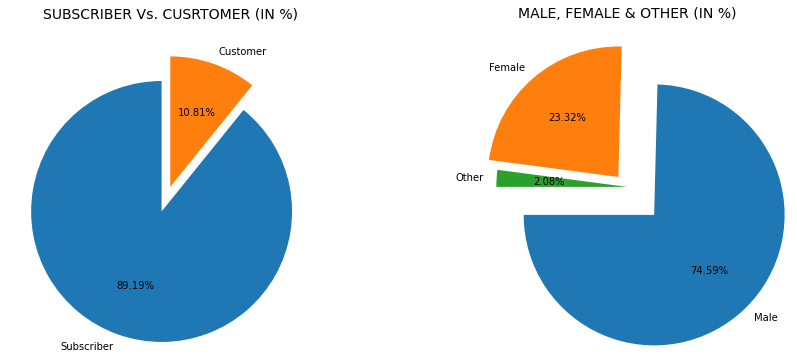

1. > __The subscribers to 'Ford GoBike' appear to use the service more frequently than customers. Customers account for only 10.18 percent of the market, while subscribers account for 89.19 percent.__
1. > __In comparison to the female bikers, males have been the most preferred bikers of the 'Ford GoBike' with 74.59 shares.__

## (Bivariate Exploration)

In [27]:
def plotformat(title, xlabel, ylabel, titleFontSize=15,labelSize=12, labelpad=16):
    '''
    This is the basic function to format plot Labels. 
    We need to provde basic information such as title, xlabel, ylablel for formatting plots. 
    TitleSize, labelsize and labelpad default values already provided.
    '''
    plt.title(title,fontsize=titleFontSize)
    plt.xlabel(xlabel, labelpad=labelpad,fontsize=labelSize)
    plt.ylabel(ylabel, labelpad=labelpad,fontsize=labelSize)

In [28]:
def plottext(ax,value):
    '''
    This is the basic function to plot text on graphs. 
    We need to provde which value we need to write on plot.
    '''
    for bar in ax.patches:
        height = bar.get_height()
        label_x_pos = bar.get_x() + bar.get_width() / 2
        ax.text(label_x_pos,height, s=value.format(height), ha='center',va='bottom')

In [29]:
#Fetching records after grouping of days of week and user type columns

per_bike=fordgobike_copy.groupby(['day_of_week','user_type']).size()

per_bike=per_bike.reset_index(name='count')

#creating new columns for % of bike rides 
per_bike['perc']=(per_bike['count']/per_bike['count'].sum())*100

per_bike.sample(2)

,day_of_week,user_type,count,perc
4,Saturday,Customer,2727,1.488415
1,Friday,Subscriber,25936,14.156046


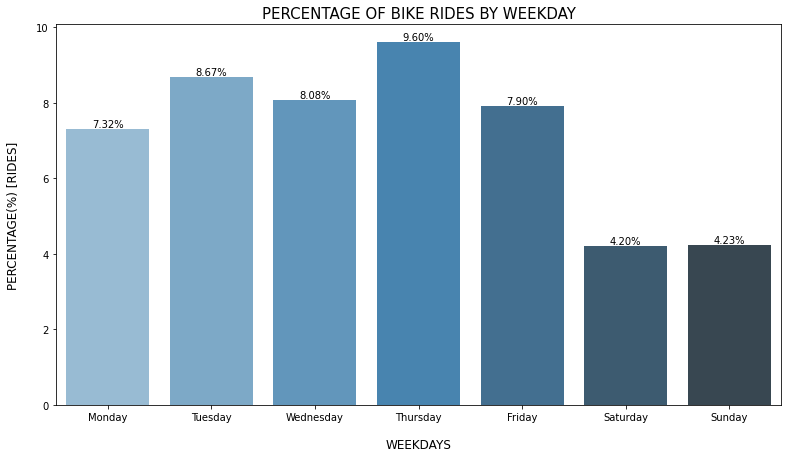

In [30]:
#figure7

plt.subplots(figsize = (13,7))

#plotting barplot graph 
ax=sb.barplot(data=per_bike,
              x='day_of_week', y='perc',
              palette="Blues_d",
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'],
              ci=None)

#Using predefined functions to plot value and format title, labels

plottext(ax,'{:.2f}%')

plotformat('PERCENTAGE OF BIKE RIDES BY WEEKDAY', 'WEEKDAYS', 'PERCENTAGE(%) [RIDES]')

plt.show();

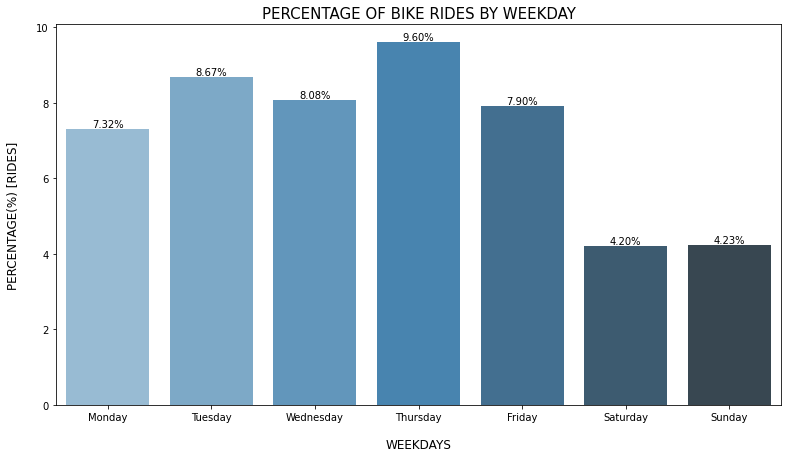

> __On weekdays, users ride their bikes significantly more than on weekends. Thursday had the highest percentage of riders (9.6%), followed by Tuesday and Wednesday.__

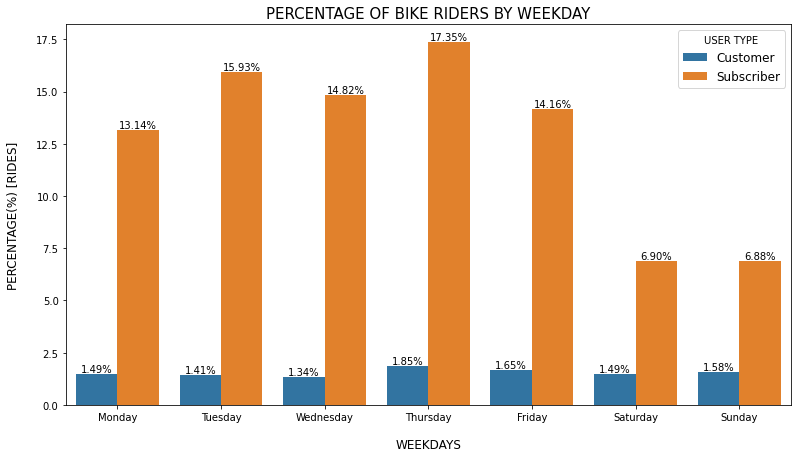

In [31]:
#figure4

plt.subplots(figsize = (13,7))

ax=sb.barplot(data=per_bike,
              x='day_of_week', y='perc', hue='user_type',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'],
              ci=None)

#Using predefined functions to plot value and format title,labels

plottext(ax,'{:.2f}%')

plotformat('PERCENTAGE OF BIKE RIDERS BY WEEKDAY', 'WEEKDAYS', 'PERCENTAGE(%) [RIDES]')

plt.legend(title='USER TYPE',loc='upper right',prop={"size":12});

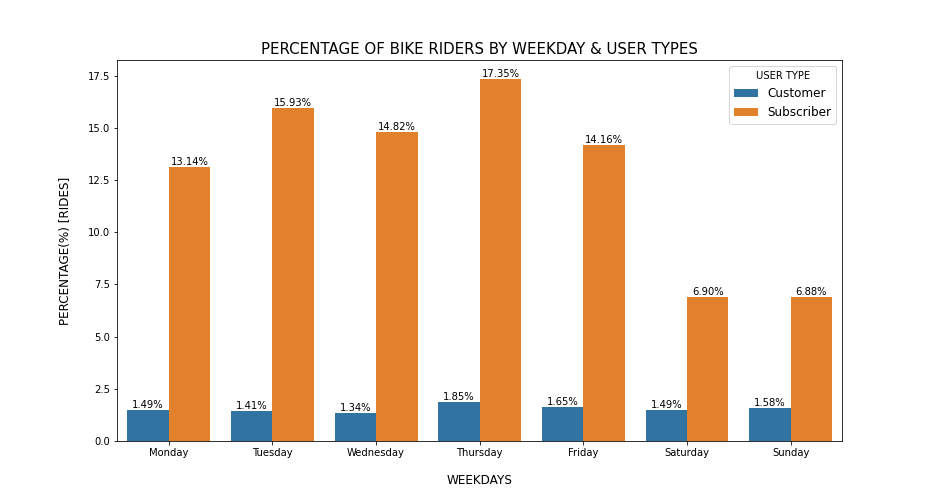

> __According to the subscriber account, the majority of bikers enjoy Thursday rides. I just combined both analyses into a single graph.__

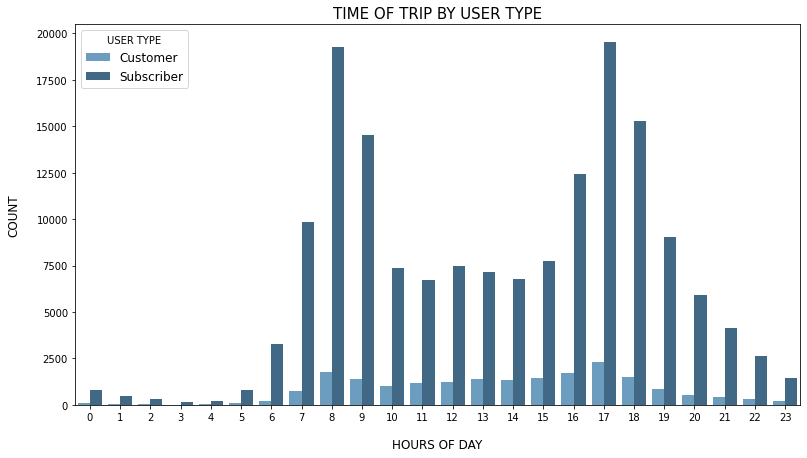

In [32]:
#figure5

plt.subplots(figsize = (13,7))

sb.countplot(data=fordgobike_copy,
             x='trip_hour',
             hue='user_type',
             palette="Blues_d")

#Using predefined functions to format title,labels
plotformat('TIME OF TRIP BY USER TYPE', 'HOURS OF DAY', 'COUNT')

plt.legend(title='USER TYPE',loc='upper left',prop={"size":12});

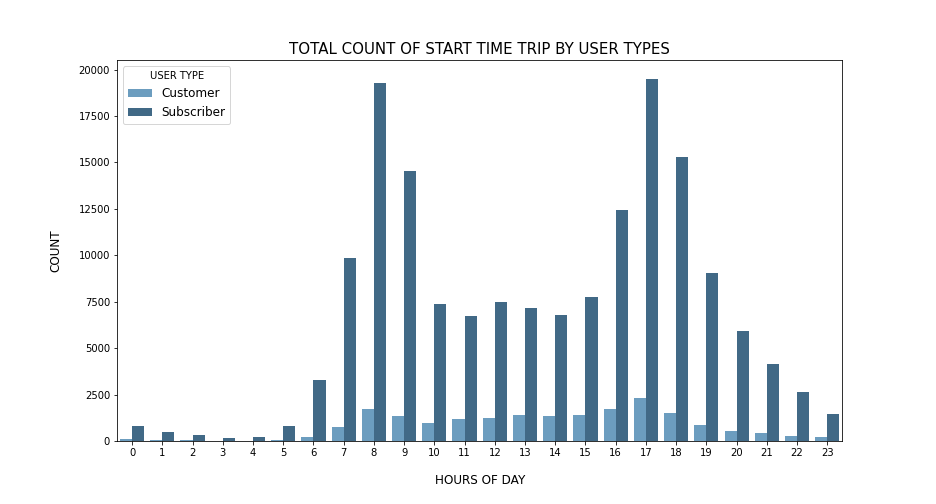

> __Subscribers' use of the bikes is clearly during peak hours, when people are going to work in the morning between 7:00 - 9:00 AM and coming home in the afternoon 4:00 - 6:00, indicating that they utilize the service to get to work. Customers prefer to bike in the afternoons or evenings.__

## (Multivariate Exploration)

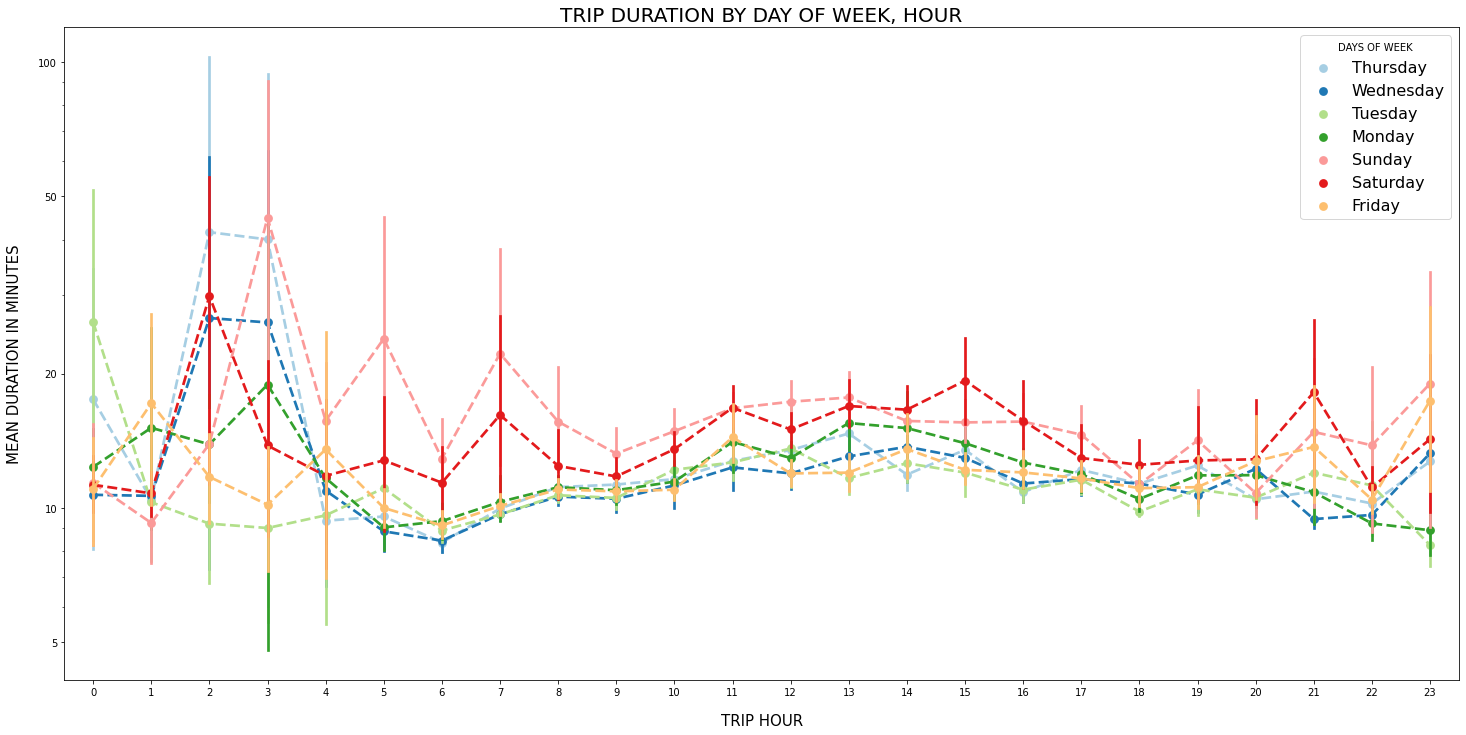

In [33]:
#figure6

plt.subplots(figsize = (25,12))

sb.pointplot(data = fordgobike_copy,
             x = 'trip_hour', y = 'trip_duration_minute', hue = 'day_of_week',
             palette = 'Paired', 
             linestyles = '--',
             linewidth=2)

#Using predefined functions to format title,labels
plotformat('TRIP DURATION BY DAY OF WEEK, HOUR', 'TRIP HOUR','MEAN DURATION IN MINUTES',20,15)

plt.legend(title='DAYS OF WEEK',loc='upper right',prop={"size":16})

plt.yscale('log')

plt.yticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100]);

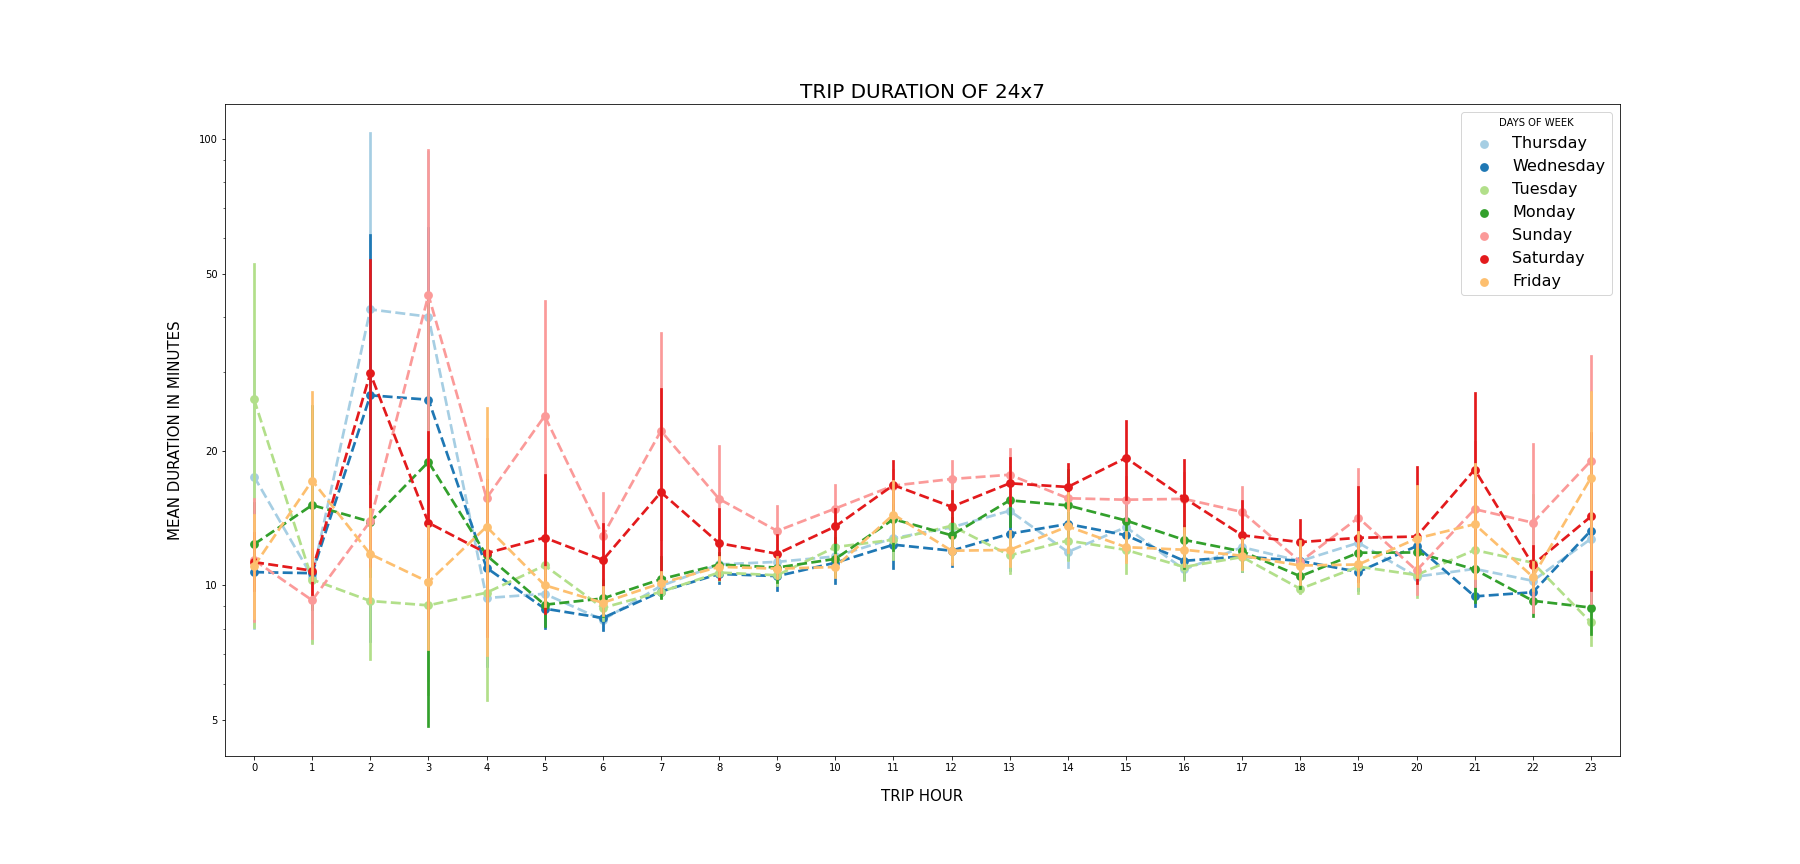

> __It may be gathered from the plot that people take much shorter or faster trips than on weekends. Weekends (Saturdays and Sundays) appear to have a higher trend line.__

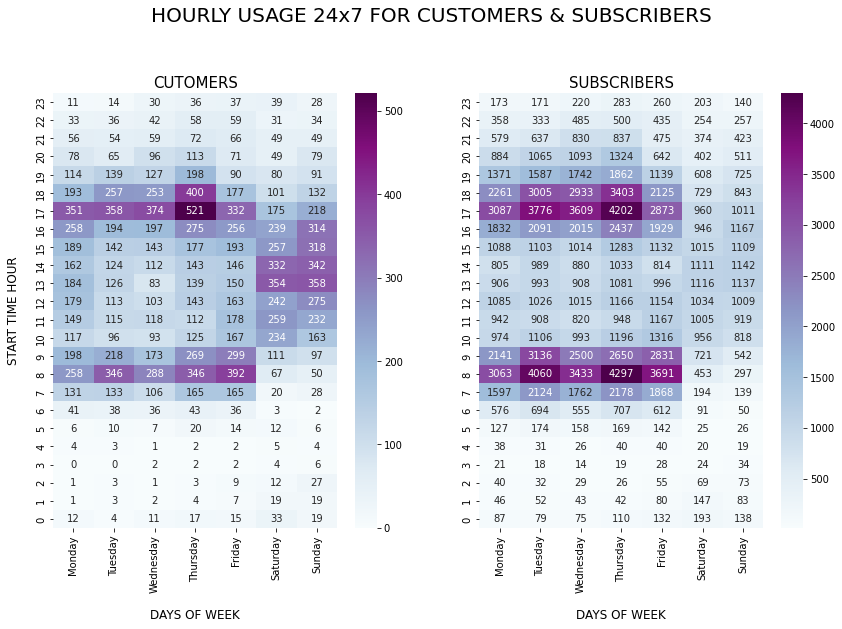

In [34]:
#figure7

# Setting the weekday order
fordgobike_copy['day_of_week'] = pd.Categorical(fordgobike_copy['day_of_week'], 
                                        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'], 
                                        ordered=True)

plt.figure(figsize=(14,8))
plt.suptitle('HOURLY USAGE 24x7 FOR CUSTOMERS & SUBSCRIBERS', fontsize=20, y=1.03)

# heatmap for customers
plt.subplot(1, 2, 1)

df_customer = fordgobike_copy.query('user_type == "Customer"').groupby(["trip_hour", "day_of_week"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("trip_hour", "day_of_week", "bike_id")
sb.heatmap(df_customer,
           cmap="BuPu",
           fmt='g',
           annot=True)

plt.ylim(0,24)

#Using predefined functions to format title,labels
plotformat('CUTOMERS', 'DAYS OF WEEK', 'START TIME HOUR')

# heatmap for subscribers
plt.subplot(1, 2, 2)

df_subscriber = fordgobike_copy.query('user_type == "Subscriber"').groupby(["trip_hour", "day_of_week"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("trip_hour", "day_of_week", "bike_id")
sb.heatmap(df_subscriber,
           cmap="BuPu",
           fmt='g',
           annot=True)

plt.ylim(0,24)

#Using predefined functions to format title,labels
plotformat('SUBSCRIBERS', 'DAYS OF WEEK', '');


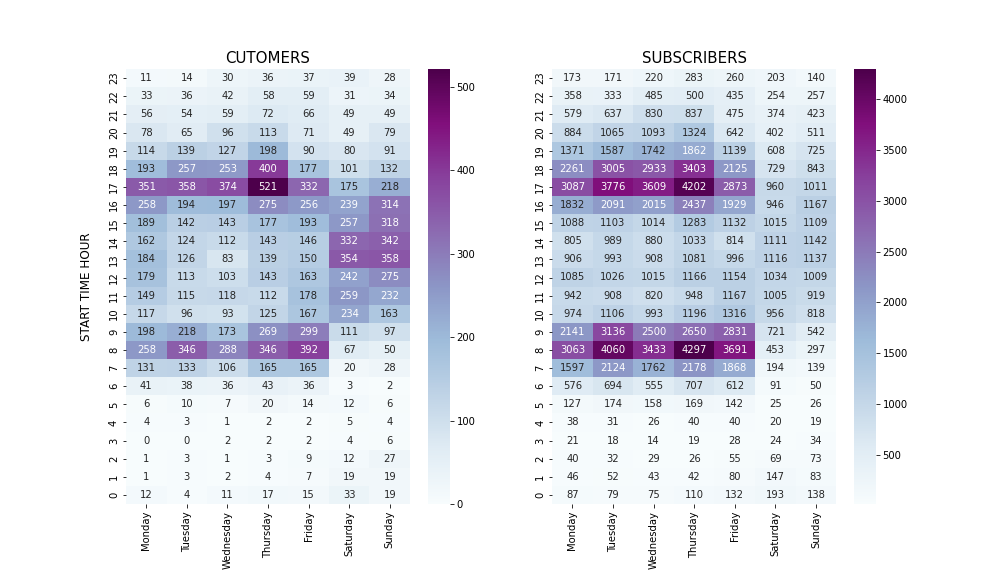

> - Distinct user types have different usage patterns (in terms of the number of rides). Subscribers make the majority of their trips on weekdays between the hours of 7-9 a.m. (peak at 8 a.m.) and 4-6 p.m. (peak at 5 p.m.), which are normal commute hours for going to work/school and returning home after work/school. 
> - For customers, the hours of 8 a.m. to 6 p.m. are the most popular. Customers' bike utilization has two peaks: one at 5 p.m. and another at 8 a.m., which is substantially lower than the 5 p.m. high. Customers' usage patterns are very consistent during the week, while weekend usage is higher.

## Conclusions
> We have the following observations regarding the data as a consequence of our investigation using the Ford GoBike System data:
> - The most popular day for bike trips has been Thursday, followed by Tuesday and Wednesday. We also noticed that the days with the fewest bike rides were Sundays and Saturdays, with nearly equal numbers of rides!
> - Males have been the most favoured motorcyclists of the 'Ford GoBike' with 74.59 shares, compared to female bikers.
> - According to previous study, male has more bike rides than female and other gender, although average length of other (gender type) has more rides in both user kinds, according to the above research.
> - The majority of bike riders begin their journeys between the hours of 8:00 a.m. and 5:00 p.m., indicating that the majority of riders utilize this service for work or college.
> - Subscribers make up the majority of persons who use the bike trips for employment or college. This is understandable because these Subscribers would enjoy certain advantages that would aid them in their daily commutes.
> - People that use bike trips prefer not to use bike-sharing services.
> - Customers, or those who have not yet subscribed to the GoBike service, appear to use the service primarily on weekends and evenings, which might be for recreational purposes.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [35]:
# Use this command if you are running this file in local
!jupyter nbconvert slidedeck_FordGoBike_data.ipynb --to html

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slidedeck_FordGoBike_data.ipynb to html
[NbConvertApp] Writing 1441977 bytes to slidedeck_FordGoBike_data.html


In [36]:
!jupyter nbconvert slidedeck_FordGoBike_data.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slidedeck_FordGoBike_data.ipynb to slides
[NbConvertApp] Writing 842366 bytes to slidedeck_FordGoBike_data.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\users\nihar\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\nihar\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\nihar\anaconda3\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "c:\users\nihar\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "c:\users\nihar\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in laun